#### Updated version of simple_sim

Features
- input road with starting number of cars $n_0$
- sink points (ralphs), each car $\in [n_0]$ is pursuing one of these points
- intersection probabilities are calculated as follows: for all of the routes from input to sink point for a given car, the car is equally likely to take any of them. Sum up the total routes across the network, and normalize accordingly to get the probabilities. 
- directed, acyclic graph (cars are assumed to flow from input to sink only)
- roads have max-capacities. 
For a given time *episode*,
- (traffic lights) each road will be updated ("green light") one by one, randomly. At any given "green light", $n_0$ (the current amount of cars on the round) times $cv$ (some constant times current road speed) will be the maximum number sent into the intersection, and split up according to p's. If the roads are at max capacity, this may be lower.
- The episode ends when all intersections have been updated once.

We evaluate a road network by the number of episodes needed for all initial cars to reach the sink points. This can be influenced by certain input parameters, the most important of which is **the structure of the road network**. We additionally will run experiments with constraints, including
- limiting the number of possible roads
- limiting the carrying capacity of each road
and varying other parameters, such as:
- number of initial cars
- sink point destinations for each car

In [17]:
import networkx as nx

class Map:
    
    # Initialization methods
    
    def __init__(self):
        self.G = nx.DiGraph()
        self.node_positions = {}
        print("""
        Road network initialized. Methods: \n
        - .add_inter(label, pos)
        - .add_road(start, end, dt, speed_limit, lanes, num_cars = 0)
        - .simulation_status_check()
        """)
        
        self.num_lanes = 0
        self.inputs = []
        self.cars_to_sinks_dict = {}
        
    def add_inter(self, label, pos):
        # label can be int or str
        self.G.add_node(label)
        self.node_positions[label] = pos
        print(f"Intersection {label} added.")
        
    def add_road(self, start, end, dt, speed_limit, lanes, num_cars = 0):
        try:
            self.G.add_edge(start, end, dt=dt, speed_limit=speed_limit, lanes=lanes, num_cars=num_cars)
            print(f"Road with {lanes} lanes between {start} and {end} added.")
            self.num_lanes += lanes
        except:
            print("Nodes do not exist.")
            
    def get_sinks(self):
        out_degrees = dict(self.G.out_degree(self.G.nodes))
        sinks = [node for node in out_degrees if out_degrees[node] == 0]
        print(sinks)
            
    # Traffic initialization
    
    def declare_inflow_node(self, node, initial_cars_to_sinks):
        
        mod_initial_cars_to_sinks = {(node, sink): initial_cars_to_sinks[sink] for sink in initial_cars_to_sinks}
        self.cars_to_sinks_dict += mod_initial_cars_to_sinks
        initial_cars = 0
        for sink in self.cars_to_sinks_dict:
            initial_cars += self.cars_to_sinks_dict[(node,sink)]
        
        self.inputs.append(node)
        input_name = "_i" + str(len(self.inputs))
        self.G.add_node(input_name)
        self.node_positions[input_name] = (self.node_positions[node][0] - 0.1, self.node_positions[node][1])
        self.add_road(input_name, node, dt=1, speed_limit=100, lanes=1, num_cars=initial_cars)
        
        print("Inflow node added.")
    
    # Check and Compilation for simulation
    
    def simulation_check_compile(self):
        # Check for acyclic
        assert nx.is_directed_acyclic_graph(self.G), "Constructed road network is not acyclic. Please try again."
        
        # Store sink points
        out_degrees = dict(self.G.out_degree(self.G.nodes))
        self.sinks = [node for node in out_degrees if out_degrees[node] == 0]
        
        # Calculate and endow intersection turn probabilities
        
        
        print(f"""
        Road network satisfactory. Summary:
        - Input Nodes: {self.inputs}
        - Sinks: {self.sinks}
        - Number of lanes used: {self.num_lanes}
        - Intersection turn probabilities calculated using weighted routing. Access or manually edit through map.G attributes.
        Network sketch:
        """)
        nx.draw(self.G)
        
    # Simulation, time-step update for road network
    
    def update_time():
        pass

            
class Intersection:
    def __init__(self, roads=[]):
        self.roads = roads # in ccw order ?
        self.terminations = 0

        self.get_out_roads()

    def add_road(self, road):
        self.roads.append(road)
        self.get_out_roads()

    def get_out_roads(self):
        self.out_roads = []
        for road in self.roads:
            if road.get_start() == self:
                self.out_roads.append(road)

    def route(self, in_road, num_cars, direction=None):
        if direction == None: # if direction is not None
            
            if in_road.num_cars >= num_cars:
                in_road.remove_cars(num_cars)
            else:
                in_road.num_cars = 0


            if len(self.out_roads) != 0:
                choice = random.choice(self.out_roads)
                choice.add_cars(num_cars)# choose random road
            else:
                self.terminations += num_cars
                
            # else cars just disappear




class Road:
    def __init__(self, dt, start, end, num_cars, speed_limit, length, lanes, name):
        self.dt = dt # size of time step
        self.start = start # starting intersection
        self.end = end # ending intersection
        self.num_cars = num_cars # number of cars
        self.speed_limit = speed_limit
        self.length = length # length of road
        self.lanes = lanes # number of lanes
        self.name = name
        
        self.connect()
        self.speed = 0
        self.update_speed()

    def connect(self):
        self.start.add_road(self)
        self.end.add_road(self)

    def update_speed(self):
        if self.num_cars > 0:
            self.speed =  self.speed_limit / self.num_cars
        else:
            self.speed = self.speed_limit
    
    def get_start(self):
        return self.start
    
    def update(self):
        self.end.route(in_road = self, num_cars = (self.num_cars * self.speed * self.dt)/self.length) 

        bar = ""
        for i in range(int(self.num_cars)):
            bar += "#"

        #print(self.name, bar)
        # send number of cars into intersection based on uniform density of cars

    def add_cars(self, num_cars):
        self.num_cars += num_cars
    def remove_cars(self, num_cars):
        self.num_cars -= num_cars
        
        

In [18]:
m = Map()


        Road network initialized. Methods: 

        - .add_inter(label, pos)
        - .add_road(start, end, dt, speed_limit, lanes, num_cars = 0)
        - .simulation_status_check()
        


In [19]:
m.add_inter(1, (0,0))
m.add_inter("sink", (1, 0))
m.add_road(1, "sink", dt=1, speed_limit=30, lanes=2)

Intersection 1 added.
Intersection sink added.
Road with 2 lanes between 1 and sink added.


In [20]:
m.get_sinks()

['sink']


In [21]:
m.declare_inflow_node(1, {'sink': 20})

Road with 1 lanes between _i1 and 1 added.
Inflow node added.



        Road network satisfactory. Summary:
        - Sinks: ['sink']
        - Number of lanes used: 3
        - Intersection turn probabilities calculated. Access through map.G.edges attributes.
        


{'dt': 1, 'speed_limit': 100, 'lanes': 1, 'num_cars': 20}

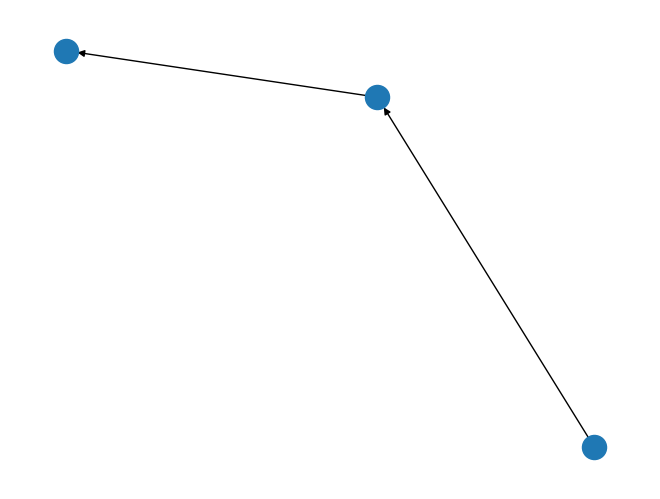

In [31]:
m.simulation_check_compile()
m.G['_i1'][1]